# Data  생성하기

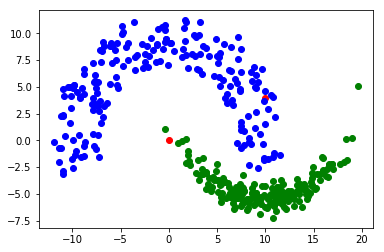

[[-2.18112665e-01  4.79219788e-01]
 [ 3.85343223e-01 -1.05618150e-01]
 [-5.79290535e-01 -1.81439823e-01]
 [ 9.21890737e-02  3.28797345e-01]
 [-6.05957102e-01 -2.32878165e-01]
 [-5.42824470e-01 -2.00618943e-01]
 [-1.98976213e-01  4.26910599e-01]
 [-1.72859720e-01  3.46278297e-01]
 [ 2.81261631e-01  6.38450555e-02]
 [ 1.48287590e-01  3.06063122e-01]
 [-5.49061130e-01  2.19654038e-01]
 [-4.03407640e-01  2.71495247e-01]
 [ 1.17457073e-01  2.55732810e-01]
 [-7.32079043e-01 -7.24933508e-02]
 [-7.02071986e-01 -1.54876961e-01]
 [-3.92936293e-01  3.37650315e-01]
 [ 3.25361555e-01  2.97690451e-01]
 [ 1.79465120e-01  1.13313663e-01]
 [ 2.38584394e-01  7.21830750e-02]
 [-6.31568748e-01  1.45936430e-02]
 [-7.09205220e-01  1.96126929e-01]
 [ 4.31355517e-01  5.16720125e-02]
 [ 2.37495762e-01  2.37769482e-01]
 [ 3.58375669e-01 -6.90790257e-02]
 [-2.60988449e-01  4.71673954e-01]
 [ 5.98299974e-02  4.75229938e-01]
 [-7.28188071e-01 -2.22836725e-01]
 [ 2.82341126e-01  6.51657038e-02]
 [-7.81533531e-01 -2

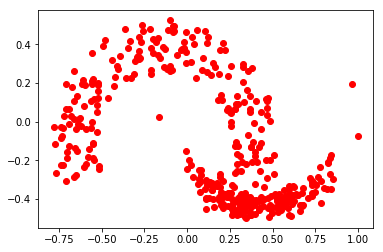

In [444]:
import numpy as np
import matplotlib.pyplot as plt
import math

### standard point
x = [0, 10]
y = [0, 4]

plt.plot(x,y,'ro')

### uniform rand
uni_angle = np.random.uniform(low=-0.1, high=1.1, size = 200) * (math.pi)
uni_r = np.random.uniform(low = 7, high = 12, size = 200)
uni_x = []
uni_y = []

for i in range(0,200):
    uni_x.append(uni_r[i] * math.cos(uni_angle[i]))
    uni_y.append(uni_r[i] * math.sin(uni_angle[i]))

plt.plot(uni_x, uni_y, 'bo')

### Gausian rand
gaus_angle = np.random.normal(loc = 0.5, scale = 0.15, size = 200)* math.pi + math.pi
gaus_r = np.random.normal(loc = 9.5, scale = 0.7, size = 200)
gaus_x = []
gaus_y = []

for i in range(0,200):
    gaus_x.append(10+gaus_r[i] * math.cos(gaus_angle[i]))
    gaus_y.append(4+gaus_r[i] * math.sin(gaus_angle[i]))

plt.plot(gaus_x,gaus_y,'go')
plt.show()

data_o = np.empty((400,2))
result = np.empty(400)

for i in range(0,200):
    data_o[i][0] = uni_x[i]
    data_o[i][1] = uni_y[i]
    data_o[i+200][0] = gaus_x[i]
    data_o[i+200][1] = gaus_y[i]
    result[i] = 1
    result[i+200] = -1

mean = data_o.mean()
data = data_origin - mean
maax = np.abs(data).max()
data = data / maax    
print data
print result
plt.figure(2)
plt.plot(data[:,0],data[:,1],'ro')

# tanh func

In [425]:
### Hyperbolic tangent
def hyper_tan(input,alpha):

    output = np.empty(input.shape)
    try:
        if input.shape[1] == 1:
            for i in range(0,input.shape[0]):
                output[i][0] = math.tanh((-1)*alpha*input[i][0])
        else:
            for i in range(0,input.shape[0]):
                for j in range(0,input.shape[1]):
                    output[i][j] = math.tanh((-1)*alpha*input[i][j])

    except Exception as e:
        print e
#         print input.shape[0], input.shape[1]
# #         print input
#         print weights_input
#         print weights_hidden
#         print weights_output
#         print "epoch is ", k
    
            
    return output

# training

In [482]:
### weights initiation
import matplotlib.pyplot as plt

N_layer = 3
N_nodes = np.array([3,2])

# weights_input = np.random.uniform(-1,1,(data.shape[1],N_nodes[0]))
# weights_hidden = np.random.uniform(-1,1,(N_nodes[0],N_nodes[1]))
# weights_output = np.random.uniform(-1,1,(N_nodes[1],1))
# bias = np.random.randn(N_layer)

weights_input = np.ones((data.shape[1],N_nodes[0]))*0.5
weights_hidden = np.ones((N_nodes[0],N_nodes[1]))*0.5
weights_output = np.ones((N_nodes[1],1))*0.5

bias_input = np.ones((1,N_nodes[0]))*0.5
bias_hidden = np.ones((1,N_nodes[1]))*0.5
bias_output = np.ones((1,1))*0.5

output = np.zeros((N_layer,np.max(N_nodes),len(data)))
epoch = 300
acc = []
loss = []
alpha = 5
lr = 0.05

for e in range(1,epoch):
    
    if e % 49 == 0:
        lr *= 0.5
        print "learning_rate :", lr
    
    ### training
    
    ## input layer
    output = data.dot(weights_input) + bias_input
    output =  hyper_tan(output,alpha)

#     print output
#     print output.shape
    
    ## hidden layer
    output = output.dot(weights_hidden) + bias_hidden
    output = hyper_tan(output,alpha)
#     print output
#     print output.shape
    
    ## output layer
    output = output.dot(weights_output) + bias_output
    output = hyper_tan(output,alpha)
#     print output
#     print output.shape
    

    ## accuracy cal
    acc_count = 0
    for i in range(0,len(output)):
        if abs(result[i]-output[i]) < 1: 
            acc_count += 1

    acc.append(float(acc_count)/float(len(data)))    
    
    ## loss cal
    error = np.empty(len(data))
    error_sum = 0
    
    for i in range(0,len(data)):
        error[i] = result[i]-output[i]
        error_sum = error_sum + 0.5*(error[i])**2
    
    loss.append(error_sum)

    
    ### optimizing
    
    
    # input layer
    for n in range(0,len(data)):
        for k in range(0,len(data[0])):
            bias_input[0][k] = bias_input[0][k] - lr*(result[n]-output[n])*(1-np.tanh((-1)*alpha*output[n]))*(1+np.tanh((-1)*alpha*output[n]))*alpha
            for j in range(0,N_nodes[0]):
                weights_sum = 0
                for i in range(0,N_nodes[1]):
                    weights_sum += weights_output[i]*weights_hidden[j][i]
                weights_input[k][j] = weights_input[k][j] - lr*(result[n]-output[n])*data[n][k]*weights_sum \
                *(1-np.tanh((-1)*alpha*output[n]))*(1+np.tanh((-1)*alpha*output[n]))*alpha
                
    #hidden layer
    for n in range(0,len(data)):
        for j in range(0,N_nodes[0]):
            bias_hidden[0][j] = bias_hidden[0][j] - lr*(result[n]-output[n])*(1-np.tanh((-1)*alpha*output[n]))*(1+np.tanh((-1)*alpha*output[n]))*alpha
            for i in range(0,N_nodes[1]):
                weights_sum = 0
                for k in range(0,len(data[0])):
                    weights_sum += weights_input[k][j]*data[n][k]
                weights_hidden[j][i] = weights_hidden[j][i] - lr*(result[n]-output[n])*weights_output[i]*weights_sum \
                *(1-np.tanh((-1)*alpha*output[n]))*(1+np.tanh((-1)*alpha*output[n]))*alpha
    
    #output layer
    for n in range(0,len(data)):
        bias_output[0][0] = bias_output[0][0] - lr*(result[n]-output[n])*(1-np.tanh((-1)*alpha*output[n]))*(1+np.tanh((-1)*alpha*output[n]))*alpha
        for i in range(0,N_nodes[1]):
            weights_sum_j= 0
            for j in range(0,N_nodes[0]):
                weights_sum_k = 0
                for k in range(0,len(data[0])):
                    weights_sum_k += weights_input[k][j]*data[n][k]
                weights_sum_j += weights_hidden[j][i]*weights_sum_k
            weights_output[i] =  weights_output[i] - lr*(result[n]-output[n])*weights_sum_j \
            *(1 - np.tanh((-1)*alpha*output[n]))*(1 + np.tanh((-1)*alpha*output[n]))*alpha
#     print output
    
    
#     print acc
#     print loss
#     print weights_input
#     print weights_hidden
#     print weights_output
#     print bias

plt.figure(1)
plt.plot(acc)
plt.title('accuraccy')

plt.figure(2)
plt.plot(loss)
plt.title('loss')

print acc[-1]
print loss[-1]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [418]:
print output

[[-0.99800467]
 [-0.99800467]
 [-0.99670855]
 [-0.99800467]
 [ 0.99837895]
 [ 0.99837893]
 [ 0.99772938]
 [ 0.9983791 ]
 [-0.99800467]
 [ 0.99837911]
 [-0.99800467]
 [ 0.99837911]
 [ 0.99837908]
 [ 0.99837904]
 [ 0.99837911]
 [ 0.9983791 ]
 [ 0.99837907]
 [ 0.9983791 ]
 [ 0.99830325]
 [-0.99800467]
 [-0.99794287]
 [-0.99800467]
 [-0.99800467]
 [-0.99789321]
 [-0.99799449]
 [ 0.99837911]
 [ 0.99837908]
 [-0.9980036 ]
 [-0.99800353]
 [ 0.99837911]
 [ 0.99818709]
 [ 0.99837911]
 [-0.99793051]
 [-0.99800014]
 [-0.98697883]
 [-0.99365863]
 [ 0.99759306]
 [ 0.99837911]
 [-0.99800441]
 [-0.9950992 ]
 [ 0.99837911]
 [ 0.99803061]
 [ 0.9983791 ]
 [-0.99800467]
 [ 0.99837911]
 [ 0.99837911]
 [-0.99800467]
 [-0.99795709]
 [ 0.9983791 ]
 [ 0.99837658]
 [-0.98097821]
 [ 0.9983789 ]
 [-0.99800467]
 [-0.99800467]
 [ 0.99837911]
 [-0.99800467]
 [ 0.99837904]
 [ 0.9983791 ]
 [-0.99800467]
 [-0.99800321]
 [-0.96915311]
 [-0.99800467]
 [ 0.99837911]
 [ 0.87891519]
 [ 0.99837911]
 [-0.99800467]
 [ 0.99837

[[-2.18112665e-01  4.79219788e-01]
 [ 3.85343223e-01 -1.05618150e-01]
 [-5.79290535e-01 -1.81439823e-01]
 [ 9.21890737e-02  3.28797345e-01]
 [-6.05957102e-01 -2.32878165e-01]
 [-5.42824470e-01 -2.00618943e-01]
 [-1.98976213e-01  4.26910599e-01]
 [-1.72859720e-01  3.46278297e-01]
 [ 2.81261631e-01  6.38450555e-02]
 [ 1.48287590e-01  3.06063122e-01]
 [-5.49061130e-01  2.19654038e-01]
 [-4.03407640e-01  2.71495247e-01]
 [ 1.17457073e-01  2.55732810e-01]
 [-7.32079043e-01 -7.24933508e-02]
 [-7.02071986e-01 -1.54876961e-01]
 [-3.92936293e-01  3.37650315e-01]
 [ 3.25361555e-01  2.97690451e-01]
 [ 1.79465120e-01  1.13313663e-01]
 [ 2.38584394e-01  7.21830750e-02]
 [-6.31568748e-01  1.45936430e-02]
 [-7.09205220e-01  1.96126929e-01]
 [ 4.31355517e-01  5.16720125e-02]
 [ 2.37495762e-01  2.37769482e-01]
 [ 3.58375669e-01 -6.90790257e-02]
 [-2.60988449e-01  4.71673954e-01]
 [ 5.98299974e-02  4.75229938e-01]
 [-7.28188071e-01 -2.22836725e-01]
 [ 2.82341126e-01  6.51657038e-02]
 [-7.81533531e-01 -2

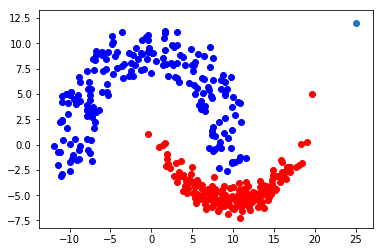

In [475]:
import matplotlib.pyplot as plt

plt.plot(uni_x, uni_y, 'bo')
plt.plot(gaus_x, gaus_y, 'ro')

x = np.linspace(-15,25,401)
y = np.linspace(-8,12,201)
data_t = np.zeros((1,2))
for i in range(0,x.shape[0]):
    for j in range(0,y.shape[0]):
        data_t = np.vstack((data,[x[i],y[j]])) 

data_n = data_t-mean
data_n = data_n/maax

print data_t
print data_n
boundary = np.empty((1,2))
# print boundary


## input layer
output = data_n.dot(weights_input) + bias_input
output = np.tanh((-1)*alpha*output)
# print output
## hidden layer
output = output.dot(weights_hidden) + bias_hidden
output = np.tanh((-1)*alpha*output)
# print output
## output layer
output = output.dot(weights_output) + bias_output
output = np.tanh((-1)*alpha*output)
# print output

for k in range(0,output.shape[0]):
    if abs(output[k]) < 0.5:
        boundary = np.vstack((boundary,data_t[k]))

            
            

# print boundary
print boundary
plt.scatter(boundary[:,0],boundary[:,1])
plt.show()

            


In [333]:
x = np.linspace(-15,25,201)
y = np.linspace(-8,12,101)
data = np.array([0,0])
for i in range(0,201):
    for j in range(0,101):
        data = np.vstack((data,[x[i],y[j]])) 

print data

[[  0.    0. ]
 [-15.   -8. ]
 [-15.   -7.8]
 ...
 [ 25.   11.6]
 [ 25.   11.8]
 [ 25.   12. ]]


In [371]:
x = np.random.randn(2,2)

print x

x = x + bias[0]

print x

x = np.linalg.norm(x)

print x

[[ 1.35769659  0.95170549]
 [ 1.881195   -1.02934809]]
[[ 1.8195183   1.4135272 ]
 [ 2.34301671 -0.56752638]]
3.3347442912216647


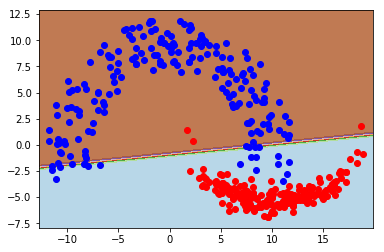

In [395]:
h = .02  # step size in the mesh
x_min, x_max = data_origin[:, 0].min() - 1, data_origin[:, 0].max() + 1
y_min, y_max = data_origin[:, 1].min() - 1, data_origin[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

data_n = np.c_[xx.ravel(),yy.ravel()]

## input layer
output = data_n.dot(weights_input) + bias[0]
output = np.tanh(output)
# print output
## hidden layer
output = output.dot(weights_hidden) + bias[1]
output = np.tanh(output)
# print output
## output layer
output = output.dot(weights_output) + bias[2]
z = np.tanh(output)
# print output
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Paired, alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.plot(uni_x, uni_y, 'bo')
plt.plot(gaus_x, gaus_y, 'ro')

In [462]:
temp = np.ones((10,2))
temp_1 = bias_input = np.ones((1,N_nodes[0]))


print temp_1
print temp + temp_1

[[1. 1.]]
[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]
